In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directoryaaaaa
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import lightgbm as ltb
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle

In [34]:
df = pd.read_csv('../input/black-friday-sales-eda/train.csv')

In [35]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [37]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [38]:
df.index

RangeIndex(start=0, stop=550068, step=1)

In [39]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [40]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [41]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [42]:
df.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [43]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [44]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [45]:
labels = ['B', 'A', 'C']

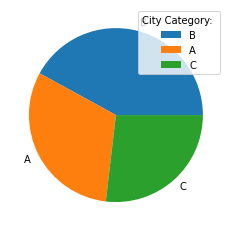

In [46]:
plt.pie(df.City_Category.value_counts(), labels=labels);
plt.legend(title='City Category: ');

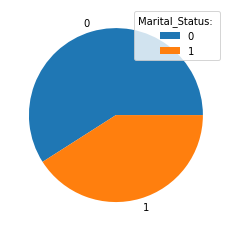

In [47]:
df.Marital_Status.unique()
myLabels = [0, 1]
plt.pie(df.Marital_Status.value_counts(), labels=myLabels);
plt.legend(title='Marital_Status: ');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


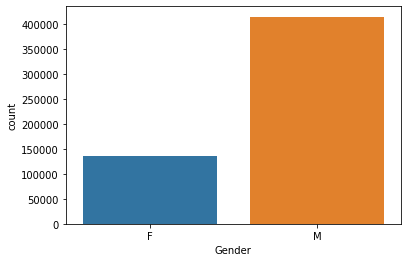

In [48]:
sns.countplot(df.Gender);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


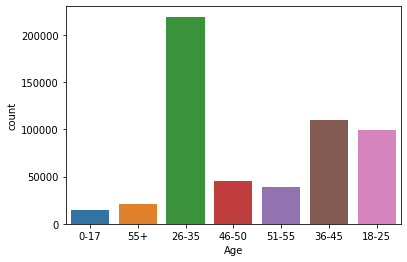

In [49]:
sns.countplot(df.Age);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


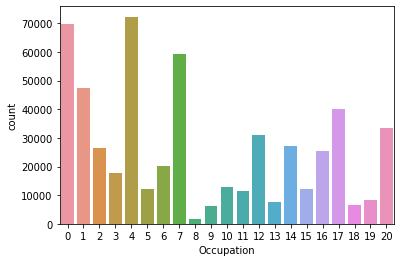

In [50]:
sns.countplot(df.Occupation);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


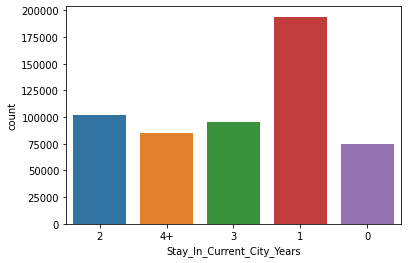

In [51]:
sns.countplot(df.Stay_In_Current_City_Years);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


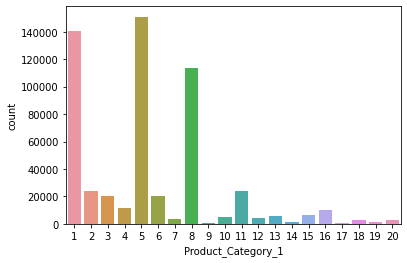

In [52]:
sns.countplot(df.Product_Category_1);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


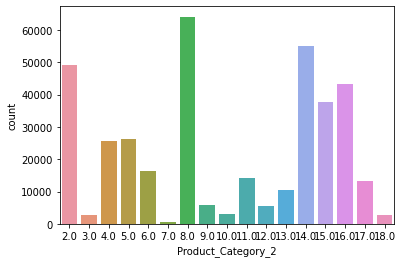

In [53]:
sns.countplot(df.Product_Category_2);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


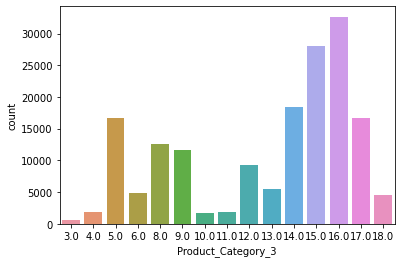

In [54]:
sns.countplot(df.Product_Category_3);

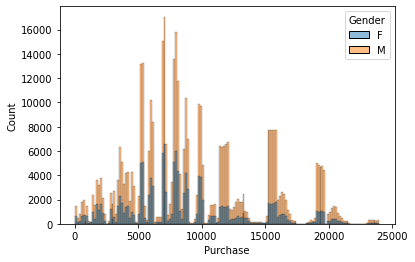

In [55]:
sns.histplot(data=df,x=df.Purchase, hue=df.Gender);

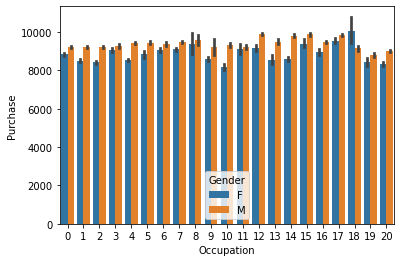

In [56]:
sns.barplot(data=df,x=df.Occupation, y=df.Purchase, hue=df.Gender);

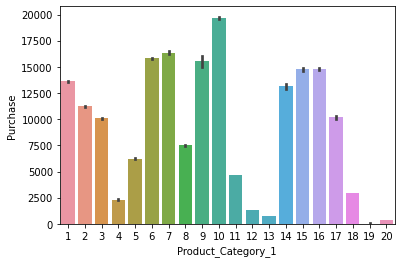

In [57]:
sns.barplot(x=df.Product_Category_1, y=df.Purchase);

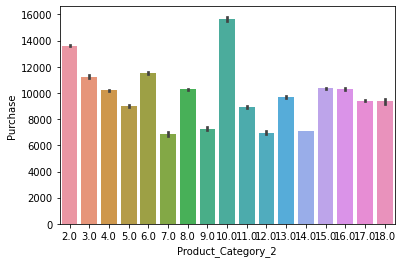

In [58]:
sns.barplot(x=df.Product_Category_2, y=df.Purchase);

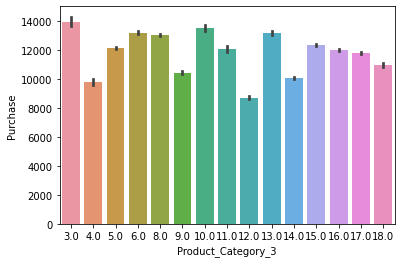

In [59]:
sns.barplot(x=df.Product_Category_3, y=df.Purchase);

In [60]:
df = df.drop(['User_ID', 'Product_ID'], axis=1)

In [61]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [62]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    missing_percent = missing_data/len(df)*100
    print(f"Column: {col} has {missing_percent}%")

Column: Gender has 0.0%
Column: Age has 0.0%
Column: Occupation has 0.0%
Column: City_Category has 0.0%
Column: Stay_In_Current_City_Years has 0.0%
Column: Marital_Status has 0.0%
Column: Product_Category_1 has 0.0%
Column: Product_Category_2 has 31.56664266963357%
Column: Product_Category_3 has 69.67265865311198%
Column: Purchase has 0.0%


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [64]:
cereal_corr = df.corr()

In [65]:
cereal_corr

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [66]:
ones_corr = np.ones_like(cereal_corr, dtype=bool)

In [67]:
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

In [68]:
adjusted_mask = mask[1:, :-1]

In [69]:
adjusted_corr = cereal_corr.iloc[1:, :-1]

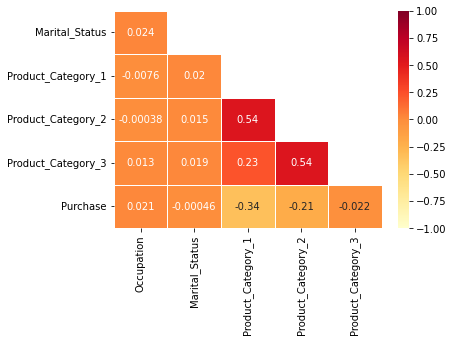

In [70]:

sns.heatmap(data=adjusted_corr, mask=adjusted_mask, annot=True,
           vmin=-1, vmax=1, linecolor='white', linewidths=0.5,
           cmap='YlOrRd');

In [71]:
df = df.replace('4+', 4)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('float')

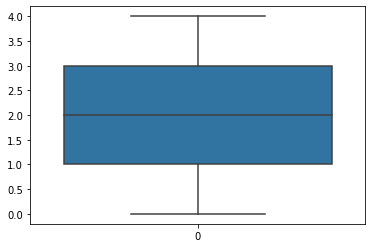

In [72]:
sns.boxplot(data=df['Stay_In_Current_City_Years']);

In [73]:
print(np.where(df['Product_Category_1']>17.5));

(array([   304,    796,   1559, ..., 550065, 550066, 550067]),)


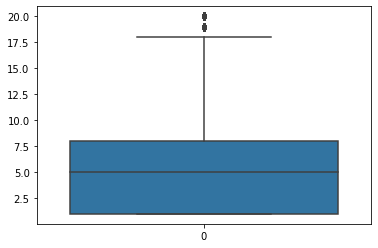

In [74]:
sns.boxplot(data=df['Product_Category_1']);

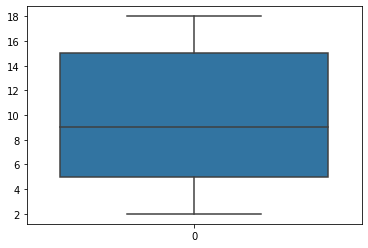

In [75]:
sns.boxplot(data=df['Product_Category_2']);

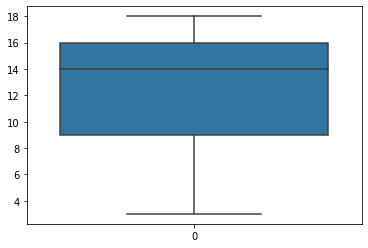

In [76]:
sns.boxplot(data=df['Product_Category_3']);

In [77]:
Q1 = np.percentile(df['Product_Category_1'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Product_Category_1'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Product_Category_1'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Product_Category_1']  <= (Q1-1.5*IQR))
 
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (550068, 10)
New Shape:  (545915, 10)


In [78]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [79]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,7:9])
X[:,7:9] = imputer.transform(X[:,7:9])

In [80]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 3])], remainder='passthrough')
ct.fit(X)
X = ct.transform(X)

In [81]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
X_train_minmax = min_max_scaler.transform(X)

In [82]:
kf= KFold(n_splits=10, shuffle=True)

In [84]:
set_parameters = [5, 6, 7, 8, 9, 10]
cnt = 0
for max_depth in range(6, 13):
    tong_rmse = 0
    for train_index, test_index in kf.split(X_train_minmax):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]    
        model = ltb.LGBMRegressor(num_leaves=pow(2, max_depth), max_depth=max_depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        tong_rmse = tong_rmse + np.sqrt(mean_squared_error(y_test, y_pred))
    cnt = cnt + 1
    print("------max_depth:", max_depth, "------")
    print("rmse trung binh: ", tong_rmse / 10)

------max_depth: 6 ------
rmse trung binh:  2918.199832756511
------max_depth: 7 ------
rmse trung binh:  2896.798715470796
------max_depth: 8 ------
rmse trung binh:  2878.5984847738955
------max_depth: 9 ------
rmse trung binh:  2863.4431147485193
------max_depth: 10 ------
rmse trung binh:  2855.341900786683
------max_depth: 11 ------
rmse trung binh:  2848.2547914540633
------max_depth: 12 ------
rmse trung binh:  2849.073440576968


In [ ]:
ong_rmse = 0
    for train_index, test_index in kf.split(X_train_minmax):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]    
        model = ltb.LGBMRegressor(num_leaves=pow(2, max_depth), max_depth=max_depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        tong_rmse = tong_rmse + np.sqrt(mean_squared_error(y_test, y_pred))
    cnt = cnt + 1
    print("------max_depth:", max_depth, "------")
    print("rmse trung binh: ", tong_rmse / 10)

In [58]:
tong_mae = 0
tong_rmse = 0
cnt = 0
for train_index, test_index in kf.split(X_train_minmax):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Lan lap: ", cnt)
    print(" mae is: ", mean_absolute_error(y_test, y_pred))
    print("rmse is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    tong_mae = tong_mae + mean_absolute_error(y_test, y_pred)
    tong_rmse = tong_rmse + np.sqrt(mean_squared_error(y_test, y_pred))
    cnt = cnt + 1
print("mae trung binh: ", tong_mae / 10)
print("rmse trung binh: ", tong_rmse / 10)

Lan lap:  0
 mae is:  3616.4185320193433
rmse is:  4694.981986578694
Lan lap:  1
 mae is:  3624.807367425955
rmse is:  4711.110424836542
Lan lap:  2
 mae is:  3610.3281273905864
rmse is:  4696.992128236682
Lan lap:  3
 mae is:  3610.9775300372416
rmse is:  4690.545244819327
Lan lap:  4
 mae is:  3612.3649447263333
rmse is:  4693.619513525483
Lan lap:  5
 mae is:  3622.8101638777453
rmse is:  4709.245048290655
Lan lap:  6
 mae is:  3591.3659463746153
rmse is:  4664.2385347625
Lan lap:  7
 mae is:  3608.9690627949167
rmse is:  4694.955571232685
Lan lap:  8
 mae is:  3612.7152107331926
rmse is:  4688.056274900345
Lan lap:  9
 mae is:  3610.2619760669622
rmse is:  4701.749911198921
mae trung binh:  3612.101886144689
rmse trung binh:  4694.549463838184


In [54]:
tong_mae = 0
tong_rmse = 0
cnt = 0
for train_index, test_index in kf.split(X_train_minmax):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Lan lap: ", cnt)
    print(" mae is: ", mean_absolute_error(y_test, y_pred))
    print("rmse is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    tong_mae = tong_mae + mean_absolute_error(y_test, y_pred)
    tong_rmse = tong_rmse + np.sqrt(mean_squared_error(y_test, y_pred))
    cnt = cnt + 1
print("mae trung binh: ", tong_mae / 10)
print("rmse trung binh: ", tong_rmse / 10)


Lan lap:  0
 mae is:  2350.3143356114933
rmse is:  3306.071337739108
Lan lap:  1
 mae is:  2359.690374712279
rmse is:  3330.546119228515
Lan lap:  2
 mae is:  2332.655048770679
rmse is:  3281.869929603007
Lan lap:  3
 mae is:  2363.9238163427226
rmse is:  3326.2155005269474
Lan lap:  4
 mae is:  2359.420414708015
rmse is:  3317.0507393180897
Lan lap:  5
 mae is:  2343.1352792012976
rmse is:  3294.7329774198565
Lan lap:  6
 mae is:  2368.6284866611804
rmse is:  3336.3651322162486
Lan lap:  7
 mae is:  2340.1925036846874
rmse is:  3289.105481454596
Lan lap:  8
 mae is:  2362.7099331959535
rmse is:  3336.798192715646
Lan lap:  9
 mae is:  2342.0443585679677
rmse is:  3286.999925732712
mae trung binh:  2352.2714551456274
rmse trung binh:  3310.5755335954723


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_train_minmax, y, test_size=0.2)
model = ltb.LGBMRegressor(num_leaves=pow(2, 8), max_depth=8)
model.fit(X_train, y_train)
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train, y_train)
model_ln = LinearRegression()
model_ln.fit(X_train, y_train)

LinearRegression()

In [57]:
pickle.dump(model, open('/kaggle/working/model.pickle', 'wb'))
pickle.dump(ct, open('/kaggle/working/ct.pickle', 'wb'))
pickle.dump(model_ln, open('/kaggle/working/model_ln.pickle', 'wb'))
pickle.dump(min_max_scaler, open('/kaggle/working/min_max_scaler.pickle', 'wb'))
pickle.dump(model_decision_tree, open('/kaggle/working/model_decision_tree.pickle', 'wb'))